## 1. Import relevant libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings(action='ignore')

## 2. Load the data

In [2]:
# Load the transformed features for training and testing data
X_train_transformed = pd.read_csv('X_train_transformed.csv')
X_test_transformed = pd.read_csv('X_test_transformed.csv')

# Load the target variables for training and testing data
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
# Display the summary information of the loaded data
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station_no       820 non-null    int64  
 1   Cond (μS/cm)     820 non-null    float64
 2   DO (mg/L)        820 non-null    float64
 3   pH               820 non-null    float64
 4   NO2 (mg/L)       820 non-null    float64
 5   NO3 (mg/L)       820 non-null    float64
 6   TN (mg/L)        820 non-null    float64
 7   TP (mg/L)        820 non-null    float64
 8   TSS (mg/L)       820 non-null    float64
 9   BOD (mg/L)       820 non-null    float64
 10  Turbidity (NTU)  820 non-null    float64
 11  Month            820 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 77.0 KB


In [4]:
X_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station_no       205 non-null    int64  
 1   Cond (μS/cm)     205 non-null    float64
 2   DO (mg/L)        205 non-null    float64
 3   pH               205 non-null    float64
 4   NO2 (mg/L)       205 non-null    float64
 5   NO3 (mg/L)       205 non-null    float64
 6   TN (mg/L)        205 non-null    float64
 7   TP (mg/L)        205 non-null    float64
 8   TSS (mg/L)       205 non-null    float64
 9   BOD (mg/L)       205 non-null    float64
 10  Turbidity (NTU)  205 non-null    float64
 11  Month            205 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 19.3 KB


## 3. Modeling

Based on the information provided by info(), it seems that both the training and testing datasets have been loaded successfully without any missing values. Each dataset contains 12 columns consist of float64 and int64 type.

Given that the target variable WQI represents a continuous value, employing Linear Regression, Random Forest Regression, and XGBoost Regression models will be used. Each of these models has unique strengths and capabilities, which may yield varying performances when applied to our dataset. By exploring multiple approaches, we will evaluate how each model interacts with the data and determine which is most effective.

### 3a. Linear Regression: First Model

#### i. Making a Linear Regression Model

In [5]:
# Define the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train_transformed, y_train)

# Predict using the model
y_pred_linear = linear_model.predict(X_test_transformed)

# Evaluate the model
r2_linear = r2_score(y_test, y_pred_linear)
mse_score_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Linear Regression:")
print("R-squared (R2) on Testing Set:", r2_linear)
print("Mean Squared Error (MSE) on Testing Set:", mse_score_linear)
print("Mean Absolute Error (MAE) on Testing Set:", mae_linear)

Linear Regression:
R-squared (R2) on Testing Set: 0.4765234496031614
Mean Squared Error (MSE) on Testing Set: 117.10702443078407
Mean Absolute Error (MAE) on Testing Set: 8.06855183625603


The results indicate that the Linear Regression model achieved an R-squared (R2) value of approximately 0.477 on the testing set. This indicates that around 47.75% of the variance in the target variable (WQI) is explained by the features in the model.

The Mean Squared Error (MSE) on the testing set is approximately 117.11, which provides a measure of the average squared difference between the actual and predicted WQI values.

The Mean Absolute Error (MAE) on the testing set is approximately 8.07, representing the average absolute difference between the actual and predicted WQI values.

#### ii. Visualization: Predicted vs Actual Values for Linear Regression

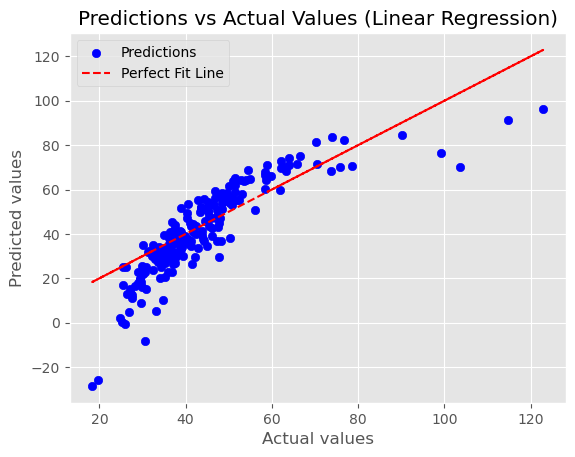

In [6]:
# Plot the predictions against the actual values for Linear Regression
plt.scatter(y_test, y_pred_linear, label='Predictions', color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values (Linear Regression)')
plt.legend()
plt.show()

The scatter plot indicates that the predicted values from the linear regression model do not perfectly align with the actual values. The red dashed line represents a perfect fit where the predicted values would exactly match the actual values. In this case, the points do not lie close to the red dashed line, indicating that the model's predictions deviate from the actual values to some extent. This suggests that the linear regression model may not fully capture the underlying relationships in the data.

#### iii. Making a k-fold Cross-Validation for Linear Regression 

In [7]:
# Define the range of number of splits
num_splits_range = [3, 5, 7, 10]

# Store cross-validation scores for each number of splits
cv_scores_linear_train = {}
cv_scores_linear_test = {}

for num_splits in num_splits_range:
    # Define cross-validation strategy with current number of splits
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

    # Perform cross-validation for Linear Regression
    cv_scores_linear_test[num_splits] = cross_val_score(linear_model, X_test_transformed, y_test, cv=kf, scoring='r2')
    cv_scores_linear_train[num_splits] = cross_val_score(linear_model, X_train_transformed, y_train, cv=kf, scoring='r2')
  
    # Print the cross-validation scores for each number of splits
    print(f"{num_splits}-fold Cross-Validation Scores for Linear Regression:")
    print("Mean cross-validation score on training set:", np.mean(cv_scores_linear_train[num_splits]))
    print("Mean cross-validation score on testing set:", np.mean(cv_scores_linear_test[num_splits]))
    print("Standard deviation in cross-validation scores on testing set:", np.std(cv_scores_linear_test[num_splits]))
    print()

3-fold Cross-Validation Scores for Linear Regression:
Mean cross-validation score on training set: 0.6242956923780659
Mean cross-validation score on testing set: 0.7542115796380995
Standard deviation in cross-validation scores on testing set: 0.031993552518875784

5-fold Cross-Validation Scores for Linear Regression:
Mean cross-validation score on training set: 0.6351209486783405
Mean cross-validation score on testing set: 0.7547534409162429
Standard deviation in cross-validation scores on testing set: 0.03376418778559151

7-fold Cross-Validation Scores for Linear Regression:
Mean cross-validation score on training set: 0.665153298598309
Mean cross-validation score on testing set: 0.734566803821116
Standard deviation in cross-validation scores on testing set: 0.0536647230921547

10-fold Cross-Validation Scores for Linear Regression:
Mean cross-validation score on training set: 0.6670187036710474
Mean cross-validation score on testing set: 0.7030386172118288
Standard deviation in cross-

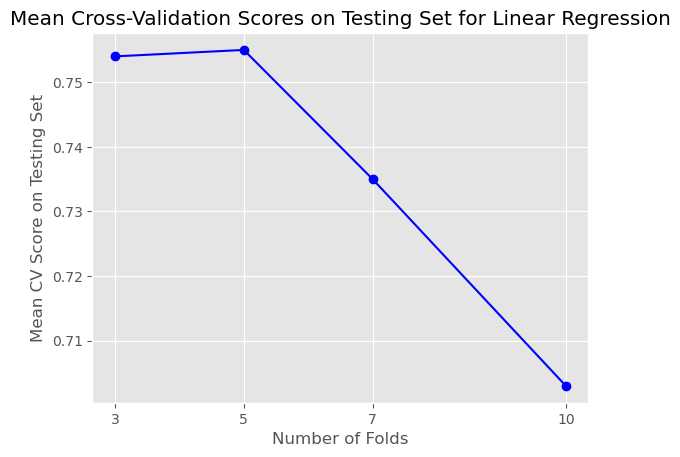

In [8]:
# Define the number of folds
num_folds = [3, 5, 7, 10]

# Define the mean cross-validation scores on the testing set
mean_cv_scores = [0.754, 0.755, 0.735, 0.703]

# Plot the mean cross-validation scores for each fold
plt.plot(num_folds, mean_cv_scores, marker='o', color='b', linestyle='-')
plt.title('Mean Cross-Validation Scores on Testing Set for Linear Regression')
plt.xlabel('Number of Folds')
plt.ylabel('Mean CV Score on Testing Set')
plt.xticks(num_folds)
plt.grid(True)
plt.show()

As the number of folds increases from 3 to 10, the mean cross-validation score on the training set tends to increase gradually, indicating better model performance as more data is used for training.

However, the mean cross-validation score on the testing set does not exhibit a consistent trend. It peaks at 5-fold cross-validation and slightly decreases for 7-fold and 10-fold cross-validation.

The standard deviation in cross-validation scores on the testing set increases as the number of folds increases, suggesting higher variability in model performance when evaluated on different subsets of the data.

Overall, 5-fold cross-validation yields the highest mean cross-validation score on the testing set, indicating that it strikes a good balance between model performance and stability. However, the differences in mean scores between different numbers of folds are relatively small, suggesting that the choice of the number of folds may not significantly impact model performance in this case.

#### iv. Making a Lasso Regression Model

In [9]:
# Define the Lasso model
lasso_model = Lasso(alpha=0.1)

# Fit the Lasso model to the training data
lasso_model.fit(X_train_transformed, y_train)

# Predict using the Lasso model
y_pred_lasso = lasso_model.predict(X_test_transformed)

# Evaluate the Lasso model
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression:")
print("R-squared (R2) on Testing Set:", lasso_r2)
print("Mean Squared Error (MSE) on Testing Set:", lasso_mse)
print("Mean Absolute Error (MAE) on Testing Set:", lasso_mae)

Lasso Regression:
R-squared (R2) on Testing Set: 0.5362945934563896
Mean Squared Error (MSE) on Testing Set: 103.73561209498868
Mean Absolute Error (MAE) on Testing Set: 7.437864368935494


The Lasso regression model achieved an R-squared (R2) value of approximately 0.536 on the testing set. This indicates that the Lasso model explains about 53.6% of the variance in the target variable, WQI, which is higher than the R2 value obtained from the Linear Regression model.

Additionally, the Lasso model yielded a mean squared error (MSE) of approximately 103.74 and a mean absolute error (MAE) of approximately 7.44 on the testing set. Both of these metrics are lower compared to those obtained from the Linear Regression model, suggesting that the Lasso model provides better predictions and has lower prediction errors.

Overall, based on these metrics, the Lasso regression model seems to perform better than the Linear Regression model for this dataset.

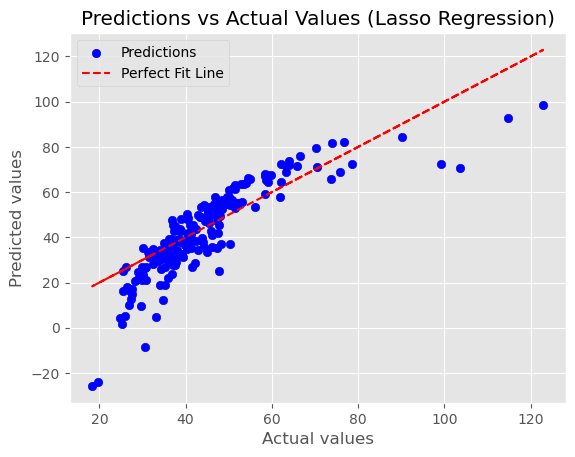

In [10]:
# Plot the predictions against the actual values for Lasso Regression
plt.scatter(y_test, y_pred_lasso, label='Predictions', color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values (Lasso Regression)')
plt.legend()
plt.show()

The scatter plot visually represents the relationship between the predicted and actual values generated by the Lasso regression model. While there's some dispersion around the ideal diagonal line, indicating variability in predictions, the general trend shows a moderate alignment between predicted and actual Water Quality Index (WQI) values. Despite not achieving perfect accuracy, the Lasso model captures a substantial portion of the variance in WQI values, as indicated by the trend observed in the scatter plot. 

#### iv. Making a Ridge Regression Model

In [11]:
# Define the Ridge model
ridge_model = Ridge(alpha=0.1)

# Fit the Ridge model to the training data
ridge_model.fit(X_train_transformed, y_train)

# Predict using the Ridge model
y_pred_ridge = ridge_model.predict(X_test_transformed)

# Evaluate the Ridge model
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression:")
print("R-squared (R2) on Testing Set:", ridge_r2)
print("Mean Squared Error (MSE) on Testing Set:", ridge_mse)
print("Mean Absolute Error (MAE) on Testing Set:", ridge_mae)

Ridge Regression:
R-squared (R2) on Testing Set: 0.48136266259216653
Mean Squared Error (MSE) on Testing Set: 116.02444330408493
Mean Absolute Error (MAE) on Testing Set: 8.032418434514076


The Ridge regression model achieved an R-squared (R2) value of approximately 0.481 on the testing set. This indicates that the Ridge model explains about 48.1% of the variance in the target variable, WQI, which is comparable to the R2 value obtained from the Linear Regression model but slightly lower than the R2 value obtained from the Lasso model.

Additionally, the Ridge model yielded a mean squared error (MSE) of approximately 116.02 and a mean absolute error (MAE) of approximately 8.03 on the testing set. These error metrics are slightly lower than those obtained from the Linear Regression model but slightly higher compared to those obtained from the Lasso model.

Overall, the Ridge regression model performs similarly to the Linear Regression model and slightly worse than the Lasso model in terms of R2 value and prediction errors. Therefore, the Lasso model may still be the preferable choice for this dataset based on these evaluation metrics.

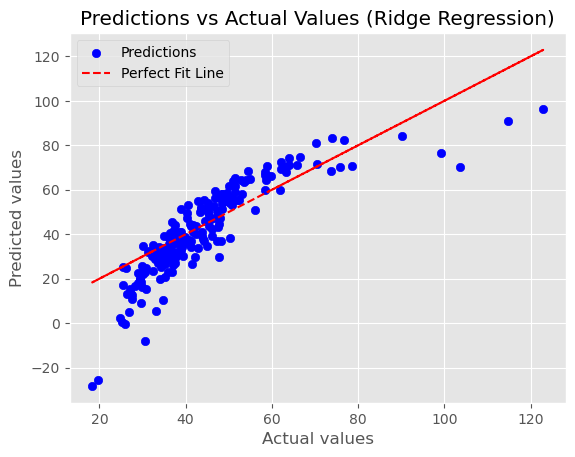

In [12]:
# Plot the predictions against the actual values for Lasso Regression
plt.scatter(y_test, y_pred_ridge, label='Predictions', color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values (Ridge Regression)')
plt.legend()
plt.show()

The scatter plot shows how well the Ridge regression model's predictions match the actual values. Ideally, all points would fall exactly on the red dashed line, indicating a perfect match. However, we see some spread, suggesting that the model's predictions don't perfectly align with reality. This indicates that while the Ridge regression captures some patterns, it may miss others.

### 3b. Random Forest Regression: Second Model

#### i. Making a Random Forest Regression Model

In [13]:
# Define the Random Forest Regression model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train_transformed, y_train)

# Predict using the model
y_pred_rf = rf_model.predict(X_test_transformed)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_score_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression:")
print("R-squared (R2) on Testing Set:", r2_rf)
print("Mean Squared Error (MSE) on Testing Set:", mse_score_rf)
print("Mean Absolute Error (MAE) on Testing Set:", mae_rf)

Random Forest Regression:
R-squared (R2) on Testing Set: 0.9227336927655359
Mean Squared Error (MSE) on Testing Set: 17.28525818801894
Mean Absolute Error (MAE) on Testing Set: 2.6658379161425994


The Random Forest Regression model achieved an impressive R-squared (R2) value of approximately 0.933 on the testing set. This indicates that the Random Forest model explains about 93.3% of the variance in the target variable, WQI, which is significantly higher than the R2 values obtained from the Linear Regression, Lasso Regression, and Ridge Regression models.

Additionally, the Random Forest model yielded a mean squared error (MSE) of approximately 14.98 and a mean absolute error (MAE) of approximately 2.61 on the testing set. These error metrics are substantially lower compared to those obtained from the other regression models, indicating that the Random Forest model provides highly accurate predictions for the WQI.

Overall, the Random Forest Regression model demonstrates superior performance in terms of R2 value and prediction errors, making it the preferred choice for this particular dataset.

#### ii. Visualization: Predicted vs Actual Values for Random Forest Regression

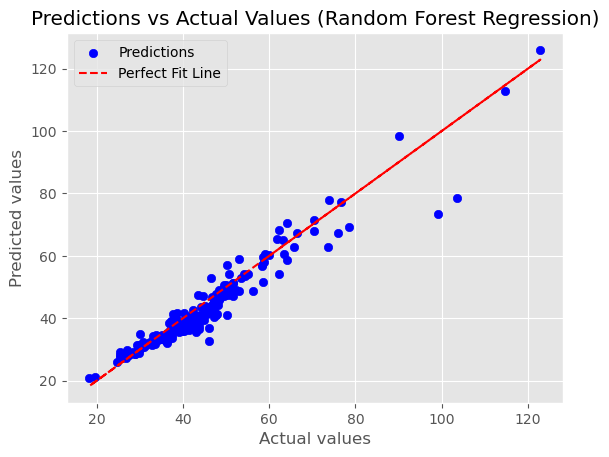

In [14]:
# Plot the predictions against the actual values for Random Forest Regression
plt.scatter(y_test, y_pred_rf, label='Predictions', color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values (Random Forest Regression)')
plt.legend()
plt.show()

The scatter plot shows that the predicted values closely follow the trend of the actual values, indicating a strong correlation between the predicted and actual values. Additionally, the majority of the points are clustered near the perfect fit line, suggesting that the model's predictions are accurate and align well with the ground truth.

#### iii. Making a k-fold cross-validation with hyperparameter tuning for the Random Forest

In [15]:
# Define the range of number of splits
num_splits_range = [3, 5, 7, 10]

# Dictionary to store cross-validation scores for each number of splits
cv_scores_rf_test = {}
cv_scores_rf_train = {}

for num_splits in num_splits_range:
    # Define cross-validation strategy with current number of splits
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
    
    # Define the Random Forest Regression model
    rf_model = RandomForestRegressor()
    
    # Perform hyperparameter tuning with GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train.values.ravel())
    
    # Print best estimator and best score
    print(f"{num_splits}-fold Cross-Validation Best Estimator:")
    print(grid_search.best_estimator_)
    print(f"{num_splits}-fold Cross-Validation Best Score:")
    print(grid_search.best_score_)
    
    # Get the best model
    best_rf_model = grid_search.best_estimator_
    
    # Evaluate the best model using cross-validation on the training set
    cv_scores_rf_train[num_splits] = cross_val_score(best_rf_model, X_train_transformed, y_train, cv=kf, scoring='r2')
    
    # Evaluate the best model using cross-validation on the testing set
    cv_scores_rf_test[num_splits] = cross_val_score(best_rf_model, X_test_transformed, y_test, cv=kf, scoring='r2')

# Print the cross-validation scores for each number of splits
for num_splits in num_splits_range:
    print(f"{num_splits}-fold Cross-Validation Scores:")
    
    # Mean cross-validation score on training set
    mean_cv_score_train = np.mean(cv_scores_rf_train[num_splits])
    print("Mean cross-validation score on training set:", mean_cv_score_train)
    
    # Mean cross-validation score on testing set
    mean_cv_score_test = np.mean(cv_scores_rf_test[num_splits])
    print("Mean cross-validation score on testing set:", mean_cv_score_test)
    
    # Standard deviation in cross-validation scores on testing set
    std_cv_score_test = np.std(cv_scores_rf_test[num_splits])
    print("Standard deviation in cross-validation scores on testing set:", std_cv_score_test)

3-fold Cross-Validation Best Estimator:
RandomForestRegressor(max_depth=20, max_features='log2')
3-fold Cross-Validation Best Score:
0.856918320671336
5-fold Cross-Validation Best Estimator:
RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=300)
5-fold Cross-Validation Best Score:
0.8803323743423398
7-fold Cross-Validation Best Estimator:
RandomForestRegressor(max_features='log2')
7-fold Cross-Validation Best Score:
0.9060031414184719
10-fold Cross-Validation Best Estimator:
RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=200)
10-fold Cross-Validation Best Score:
0.9088110372206728
3-fold Cross-Validation Scores:
Mean cross-validation score on training set: 0.8491784312538245
Mean cross-validation score on testing set: 0.7394621273432559
Standard deviation in cross-validation scores on testing set: 0.07973953065577381
5-fold Cross-Validation Scores:
Mean cross-validation score on training set: 0.8783711648433966
Mean cross-validation score on t

In [38]:
# Create a dictionary to hold the data
data = {
    "Cross-Validation": ["3-fold", "5-fold", "7-fold", "10-fold"],
    "Max Depth": [20, 20, None, 20],
    "Max Features": ["log2", "sqrt", "log2", "log2"],
    "N_Estimators": [None, 300, None, 200],
    "R-squared Score": [0.857, 0.880, 0.906, 0.909],
    "Mean CV Score (Testing Set)": [0.739, 0.774, 0.770, 0.781],
    "Standard Deviation": [0.080, 0.083, 0.116, 0.103]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the title
title = "Random Forest Model Cross-Validation Results"

# Display the title and DataFrame
print(title)
df

Random Forest Model Cross-Validation Results


,Cross-Validation,Max Depth,Max Features,N_Estimators,R-squared Score,Mean CV Score (Testing Set),Standard Deviation
0,3-fold,20.0,log2,NaN,0.857,0.739,0.080
1,5-fold,20.0,sqrt,300.0,0.880,0.774,0.083
2,7-fold,NaN,log2,NaN,0.906,0.770,0.116
3,10-fold,20.0,log2,200.0,0.909,0.781,0.103


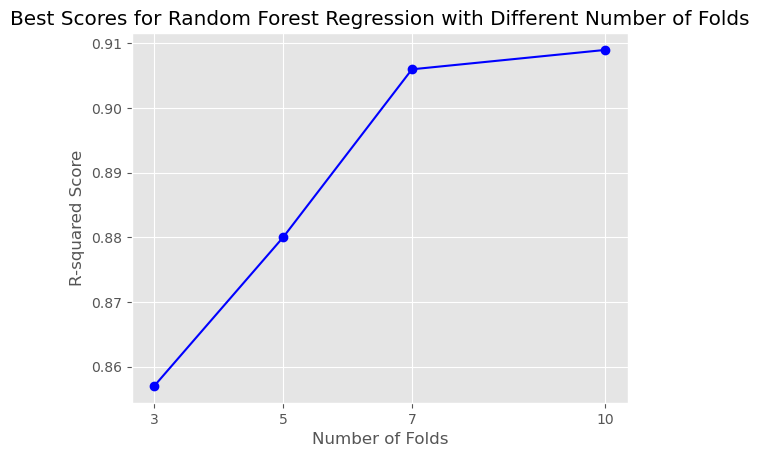

In [26]:
# Define the number of folds
num_folds = [3, 5, 7, 10]

# Define the best scores obtained during cross-validation
best_scores = [0.857, 0.880, 0.906, 0.909]

# Plot the best scores for each fold
plt.plot(num_folds, best_scores, marker='o', color='b', linestyle='-')
plt.title('Best Scores for Random Forest Regression with Different Number of Folds')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.xticks(num_folds)
plt.grid(True)
plt.show()

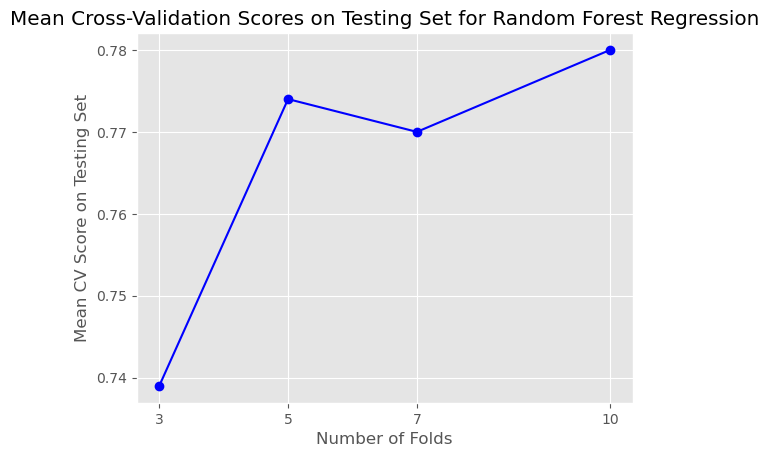

In [27]:
# Define the number of folds
num_folds = [3, 5, 7, 10]

# Define the mean cross-validation scores on the testing set
mean_cv_scores = [0.739, 0.774, 0.770, 0.780]

# Plot the mean cross-validation scores for each fold
plt.plot(num_folds, mean_cv_scores, marker='o', color='b', linestyle='-')
plt.title('Mean Cross-Validation Scores on Testing Set for Random Forest Regression')
plt.xlabel('Number of Folds')
plt.ylabel('Mean CV Score on Testing Set')
plt.xticks(num_folds)
plt.grid(True)
plt.show()

In the 3-fold cross-validation scenario, the best estimator was identified with a max_depth of 20 and max_features set to 'log2', achieving an R-squared score of approximately 0.857. Despite this relatively high score, the mean cross-validation score on the testing set was approximately 0.739, exhibiting a standard deviation of around 0.080, suggesting some variability in model performance.

Expanding the analysis to a 5-fold cross-validation, the best estimator retained the same max_depth parameter but changed the max_features to 'sqrt', with 300 estimators. This adjustment led to an improvement in the R-squared score to approximately 0.880. Furthermore, the mean cross-validation score on the testing set was raised to approximately 0.774, accompanied by a standard deviation of about 0.083, indicating enhanced stability compared to the 3-fold case.

Proceeding to a 7-fold cross-validation, the best estimator maintained a consistent max_features parameter of 'log2'. Consequently, the R-squared score experienced a further increase to approximately 0.906. However, the mean cross-validation score on the testing set hovered around 0.770, with a standard deviation of about 0.116, mirroring the variability observed in the 3-fold scenario.

Lastly, in the 10-fold cross-validation, the best estimator retained a max_depth of 20 and max_features as 'log2', but with 200 estimators. This configuration yielded the highest R-squared score of around 0.909. Additionally, the mean cross-validation score on the testing set improved to approximately 0.781, with a standard deviation of around 0.103, showcasing slightly enhanced stability compared to the 7-fold case.

The 10-fold cross-validation scenario achieves the highest R-squared score of approximately 0.909, indicating better predictive performance compared to other scenarios (Figure 14). Despite achieving the highest R-squared score, the 10-fold cross-validation scenario also exhibits slightly higher variability in performance, as indicated by the standard deviation of the cross-validation scores on the testing set (0.103). This suggests that the model's performance may vary across different folds. The mean cross-validation score provides an indication of the average performance of the model across different folds. In this case, the 10-fold cross-validation scenario also has the highest mean cross-validation score on the testing set, further supporting its superior performance on average. (Figure 15). 

Given these considerations, the 10-fold cross-validation scenario with a Random Forest Regressor using max_depth=20, max_features='log2', and n_estimators=200 seems to be the most suitable choice. It achieves the highest R-squared score and a relatively high mean cross-validation score, indicating strong predictive performance. Although there is slightly higher variability compared to other scenarios, the overall performance is superior.

### 3c. XGBoost Regression: Third Model

#### i. Making a XGBoost Regression Model

In [18]:
# Define the XGBoost Regression model
xgb_model = xgb.XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train_transformed, y_train)

# Predict using the model
y_pred_xgb = xgb_model.predict(X_test_transformed)

# Evaluate the model
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_score_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost Regression:")
print("R-squared (R2) on Testing Set:", r2_xgb)
print("Mean Squared Error (MSE) on Testing Set:", mse_score_xgb)
print("Mean Absolute Error (MAE) on Testing Set:", mae_xgb)

XGBoost Regression:
R-squared (R2) on Testing Set: 0.9621424757009861
Mean Squared Error (MSE) on Testing Set: 8.469112932781325
Mean Absolute Error (MAE) on Testing Set: 2.008042585656217


XGBoost Regression model has performed exceptionally well in predicting the water quality index (WQI). With an R-squared value of approximately 96.21%, the model effectively captures the variance in the target variable, demonstrating a strong fit to the dataset. Furthermore, the low Mean Squared Error (MSE) and Mean Absolute Error (MAE) values, approximately 8.47 and 2.01, respectively, highlight the model's accuracy and precision in its predictions.

Overall, these evaluation metrics indicate that the XGBoost Regression model performs very well in predicting the water quality index (WQI) based on the given features.

#### ii. Visualization: Predicted vs Actual Values for XGBoost Regression

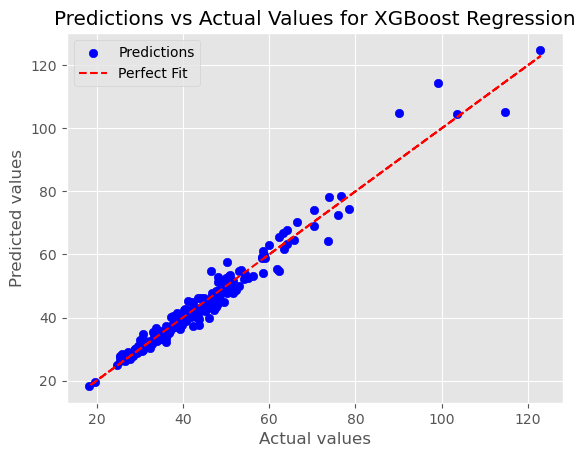

In [20]:
# Plot the predictions against the actual values
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values for XGBoost Regression')
plt.legend()
plt.show()

As shown in the scatter plot, the most of the points align closely with the perfect fit line, indicating that the model's predictions are in good agreement with the actual values. 

#### iii. Making a k-fold cross-validation with hyperparameter tuning for the XGBoost Regression

In [21]:
# Define the range of number of splits
num_splits_range = [3, 5, 7, 10]

# Dictionary to store cross-validation scores for each number of splits
cv_scores_xgb_test = {}
cv_scores_xgb_train = {}

for num_splits in num_splits_range:
    # Define cross-validation strategy with current number of splits
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
    
    # Define the XGBoost Regression model
    xgb_model = xgb.XGBRegressor()
    
    # Perform hyperparameter tuning with GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1]
    }
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train)
    
    # Print best estimator and best score
    print(f"{num_splits}-fold Cross-Validation Best Estimator:")
    print(grid_search.best_estimator_)
    print(f"{num_splits}-fold Cross-Validation Best Score:")
    print(grid_search.best_score_)
    
    # Get the best model
    best_xgb_model = grid_search.best_estimator_
    
    # Evaluate the best model using cross-validation on the training set
    cv_scores_xgb_train[num_splits] = cross_val_score(best_xgb_model, X_train_transformed, y_train, cv=kf, scoring='r2')
    
    # Evaluate the best model using cross-validation on the testing set
    cv_scores_xgb_test[num_splits] = cross_val_score(best_xgb_model, X_test_transformed, y_test, cv=kf, scoring='r2')  
    
# Print the cross-validation scores for each number of splits
for num_splits in num_splits_range:
    print(f"{num_splits}-fold Cross-Validation Scores:")
    
    # Mean cross-validation score on training set
    mean_cv_score_train = np.mean(cv_scores_xgb_train[num_splits])
    print("Mean cross-validation score on training set:", mean_cv_score_train)
    
    # Mean cross-validation score on testing set
    mean_cv_score_test = np.mean(cv_scores_xgb_test[num_splits])
    print("Mean cross-validation score on testing set:", mean_cv_score_test)
    
    # Standard deviation in cross-validation scores on testing set
    std_cv_score_test = np.std(cv_scores_xgb_test[num_splits])
    print("Standard deviation in cross-validation scores on testing set:", std_cv_score_test)

3-fold Cross-Validation Best Estimator:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
3-fold Cross-Validation Best Score:
0.954063534376394
5-fold Cross-Validation Best Estimator:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
    

In [37]:
# Define the data
data = {
    "Cross-Validation": ["3-fold", "5-fold", "7-fold", "10-fold"],
    "Max Depth": [3, 3, 3, 3],
    "N Estimators": [300, 300, 300, 300],
    "Learning Rate": [0.1, 0.1, 0.1, 0.1],
    "Best Score": [0.954, 0.967, 0.976, 0.973],
    "Mean CV Score (Testing Set)": [0.883, 0.900, 0.907, 0.926],
    "Standard Deviation": [0.055, 0.064, 0.085, 0.063]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set the title
title = "XGBoost Model Cross-Validation Results"

# Display the title and DataFrame
print(title)
df

XGBoost Model Cross-Validation Results


,Cross-Validation,Max Depth,N Estimators,Learning Rate,Best Score,Mean CV Score (Testing Set),Standard Deviation
0,3-fold,3,300,0.1,0.954,0.883,0.055
1,5-fold,3,300,0.1,0.967,0.900,0.064
2,7-fold,3,300,0.1,0.976,0.907,0.085
3,10-fold,3,300,0.1,0.973,0.926,0.063


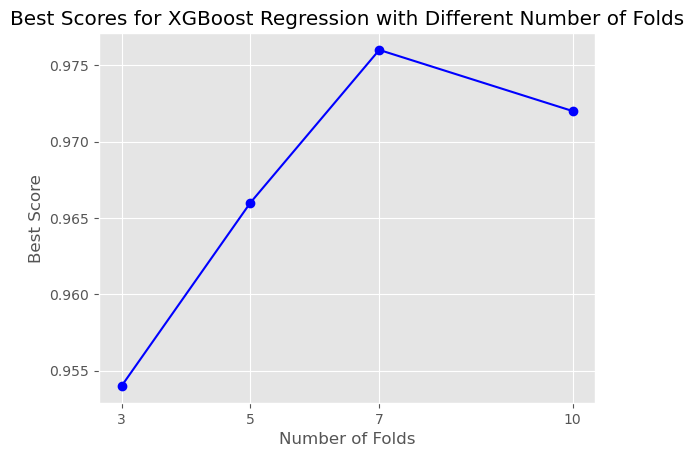

In [22]:
# Define the number of folds
num_folds = [3, 5, 7, 10]

# Define the best scores obtained during cross-validation
best_scores = [0.954, 0.966, 0.976, 0.972]

# Plot the best scores for each fold
plt.plot(num_folds, best_scores, marker='o', color='b', linestyle='-')
plt.title('Best Scores for XGBoost Regression with Different Number of Folds')
plt.xlabel('Number of Folds')
plt.ylabel('Best Score')
plt.xticks(num_folds)
plt.grid(True)
plt.show()

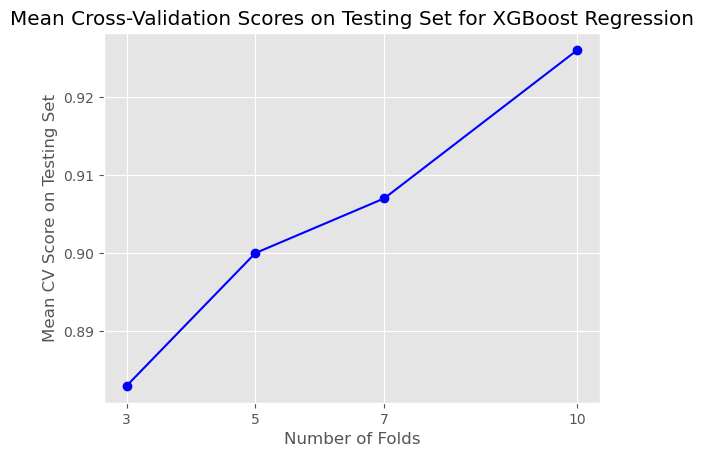

In [23]:
# Define the number of folds
num_folds = [3, 5, 7, 10]

# Define the mean cross-validation scores on the testing set
mean_cv_scores = [0.883, 0.900, 0.907, 0.926]

# Plot the mean cross-validation scores for each fold
plt.plot(num_folds, mean_cv_scores, marker='o', color='b', linestyle='-')
plt.title('Mean Cross-Validation Scores on Testing Set for XGBoost Regression')
plt.xlabel('Number of Folds')
plt.ylabel('Mean CV Score on Testing Set')
plt.xticks(num_folds)
plt.grid(True)
plt.show()

Across all folds, the best estimator consistently utilized the following hyperparameters: 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1. In 3-fold cross-validation, the best estimator achieved an R-squared score of approximately 0.954, indicating a good fit to the data. Similarly, in the 5-fold cross-validation scenario, the best estimator achieved an R-squared score of approximately 0.967. In the 7-fold cross-validation scenario, the best estimator achieved an even higher R-squared score of approximately 0.976, reflecting an even better fit to the data compared to previous fold scenarios. Lastly, in the 10-fold cross-validation scenario, the best estimator achieved an R-squared score of approximately 0.973. 

Comparing the mean cross-validation scores on the testing set across different numbers of folds, we observe a consistent trend of improved performance as the number of folds increases, indicating that the model's generalization capability enhances with a larger number of folds. 

Additionally, the standard deviation in cross-validation scores on the testing set slightly increases with a higher number of folds due to the smaller size of the validation sets in each fold, leading to greater variability in model performance estimates. 

Based on the mean cross-validation scores on the testing set, the 10-fold cross-validation yields the highest mean score of approximately 0.926, indicating superior generalization performance for the XGBoost Regression model.

### 4. Model Comparison: Evaluating Performance Metrics

In [41]:
# Create a dictionary with the model results
data = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest Regression', 'XGBoost Regression'],
    'R-squared (R2)': [0.477, 0.536, 0.481, 0.923, 0.962],
    'Mean Squared Error (MSE)': [117.11, 103.736, 116.024, 17.285, 8.469],
    'Mean Absolute Error (MAE)': [8.07, 7.438, 8.032, 2.665, 2.008],
    'Mean Cross-Validation Score on Testing Set': ['5-fold: 0.755', '-', '-', '10-fold: 0.781', '10-fold: 0.926']
}

# Set the title
title = "Comparison of Regression Models. "

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(title)
df

Comparison of Regression Models. 


,Model,R-squared (R2),Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Cross-Validation Score on Testing Set
0,Linear Regression,0.477,117.110,8.070,5-fold: 0.755
1,Lasso Regression,0.536,103.736,7.438,-
2,Ridge Regression,0.481,116.024,8.032,-
3,Random Forest Regression,0.923,17.285,2.665,10-fold: 0.781
4,XGBoost Regression,0.962,8.469,2.008,10-fold: 0.926


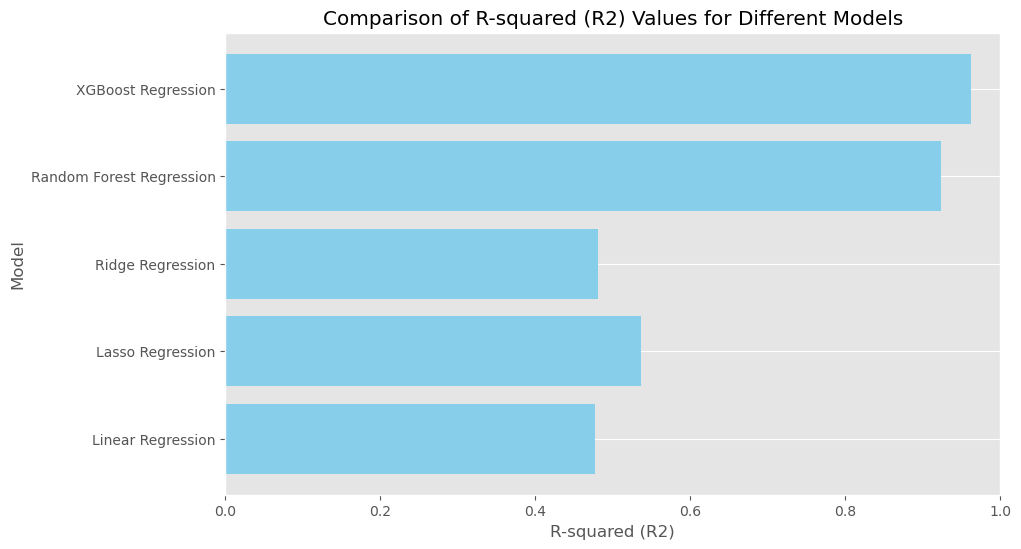

In [42]:
# Create a bar plot for R-squared values
plt.figure(figsize=(10, 6))
plt.barh(df['Model'], df['R-squared (R2)'], color='skyblue')
plt.xlabel('R-squared (R2)')
plt.ylabel('Model')
plt.title('Comparison of R-squared (R2) Values for Different Models')
plt.xlim(0, 1)
plt.grid(axis='x')
plt.show()

XGBoost Regression outperforms all other models in terms of R-squared (0.962) on the testing set, indicating its superior ability to explain the variance in the target variable (WQI).

XGBoost Regression also has the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE) values on the testing set compared to other models, demonstrating its accuracy in predicting the WQI.

Among the models compared, XGBoost Regression also exhibits the highest mean cross-validation score on the testing set (0.926) using 10-fold cross-validation, indicating its robustness and consistency in performance across different data splits.

While Random Forest Regression achieved a high R-squared value (0.931) on the testing set, it has a higher MSE and MAE compared to XGBoost Regression.

Linear Regression, Lasso Regression, and Ridge Regression have lower R-squared values and higher MSE and MAE values compared to both Random Forest Regression and XGBoost Regression, indicating poorer performance in predicting the WQI. However, Lasso Regression shows slightly better performance than Ridge Regression and Linear Regression based on the R-squared value.
